# 通し課題（カタカナ１５文字分類）

## 使用するライブラリのインポート

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from layers import TwoLayerNet
from CNN import SimpleConvNet
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数
import pickle
from sklearn.model_selection import train_test_split # ホールドアウト法に関する関数
import random # 乱数
from common.optimizer import RMSProp
import gc

## 課題データセットの読み込み

In [2]:
# 課題データセットを読み込む
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")
print(train_data.shape)
print(train_label.shape)
train_data_kai = np.load("../1_data/train_data_kai.npy")
train_label_kai = np.load("../1_data/train_label_kai.npy")
print(train_data_kai.shape)
print(train_label_kai.shape)

(3000, 1, 28, 28)
(3000, 15)
(48000, 1, 28, 28)
(48000, 15)


0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


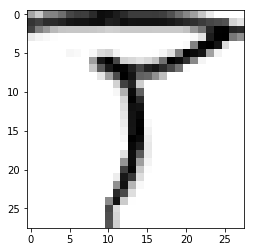

0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


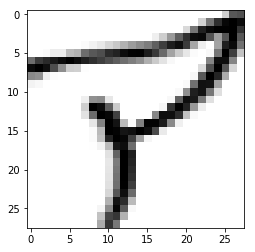

0
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


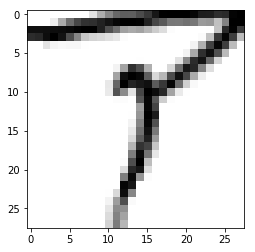

1
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


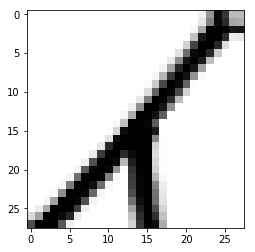

1
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


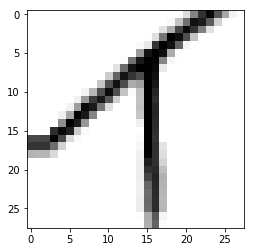

1
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


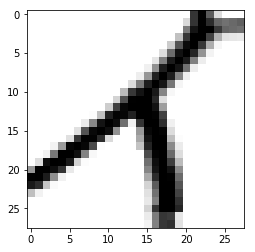

2
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


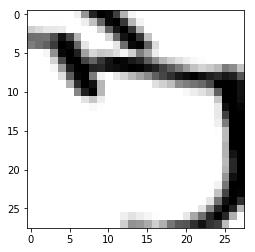

2
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


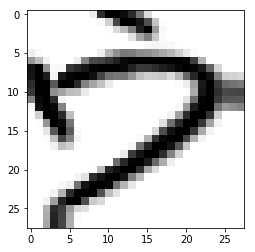

2
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


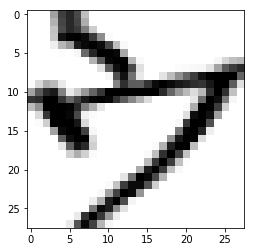

3
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


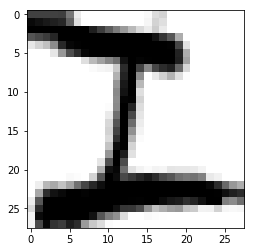

3
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


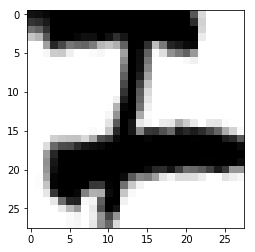

3
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]


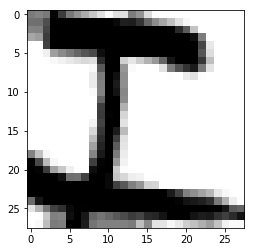

4
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


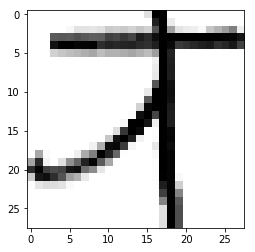

4
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


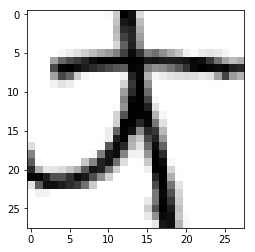

4
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


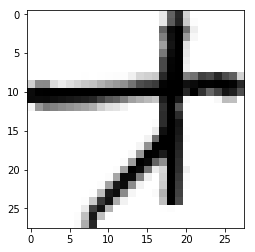

5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


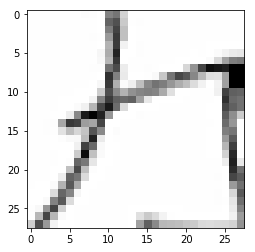

5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


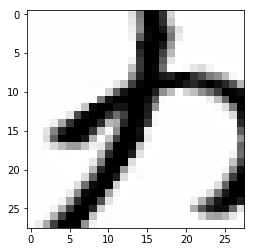

5
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


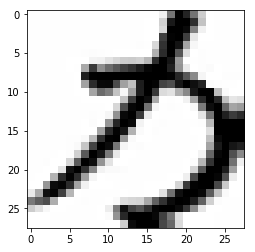

6
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


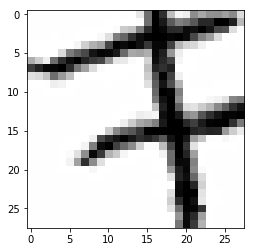

6
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


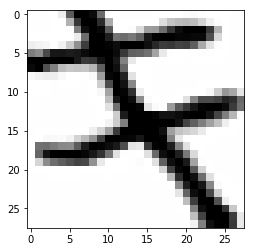

6
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


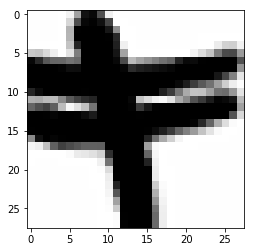

7
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


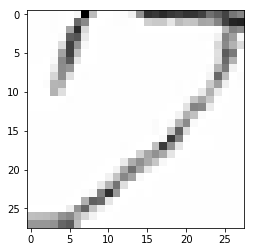

7
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


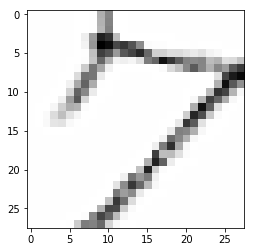

7
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


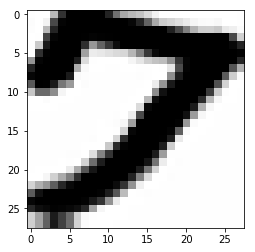

8
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


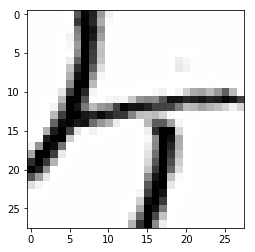

8
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


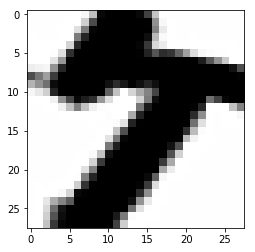

8
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


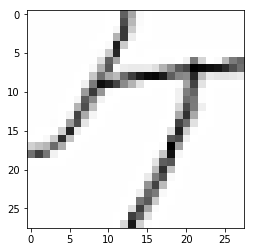

9
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


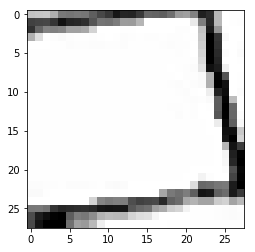

9
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


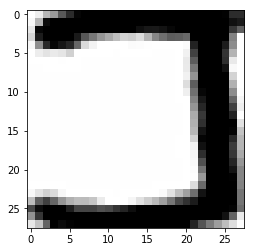

9
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


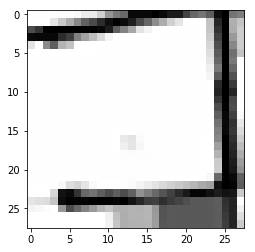

10
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


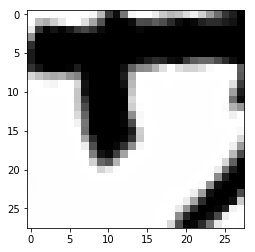

10
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


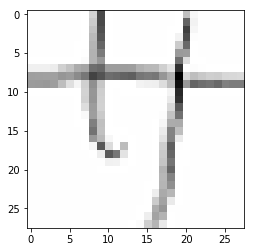

10
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


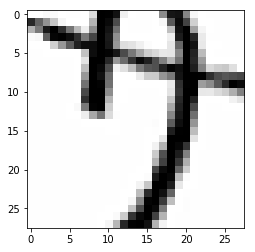

11
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


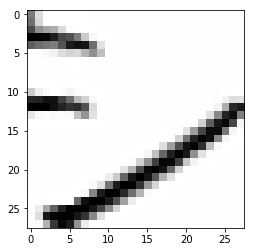

11
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


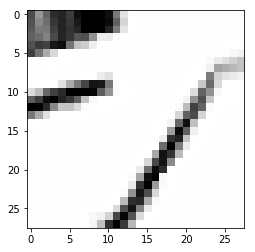

11
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


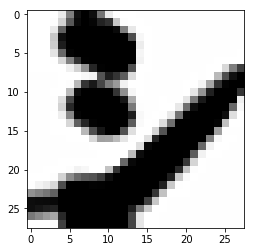

12
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


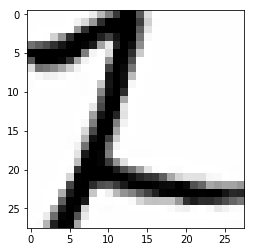

12
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


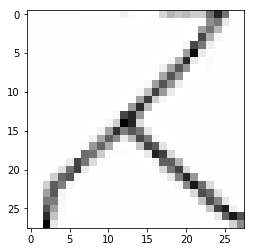

12
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


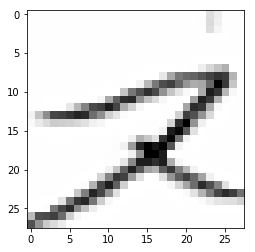

13
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


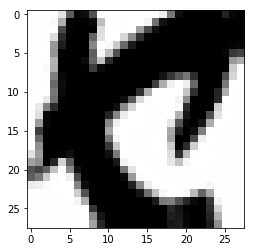

13
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


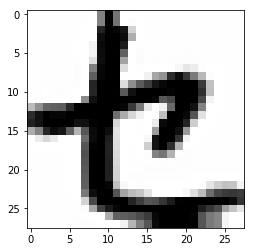

13
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


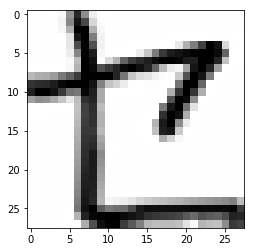

14
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


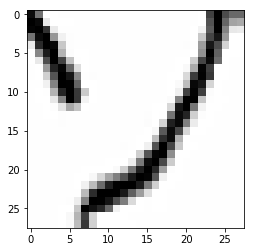

14
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


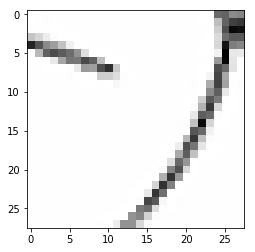

14
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


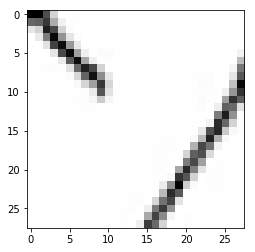

In [3]:
train_data_kai = train_data_kai.reshape(48000, 1, 28, 28)
# 元画像を表示
for i in range(15):
    count = 0
    for ind in range(1000):
        # カタカナ番号
        num = np.where(train_label[ind])[0][0]
        if num==i:
            img = train_data_kai[ind]
            label = train_label[ind]  
            print(i)
            print(label)
            plt.imshow(img[0,:,:], cmap='gray')
            plt.show()
            count += 1
            if count==3:
                break

In [4]:
# 正規化
train_data = (train_data - train_data.min()) / train_data.max()
train_data = train_data.astype('float32')
print(train_data)
print()

train_data_kai = (train_data_kai - train_data_kai.min()) / train_data_kai.max()
train_data_kai = train_data_kai.astype('float32')
print(train_data_kai)
print()

[[[[0.99607843 0.99607843 0.99607843 ... 1.         1.
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.6901961  1.
    1.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    1.        ]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   [0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]
   ...
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.        ]
   [0.99607843 0.99607843 0.99607843 ... 0.         0.
    0.2627451 ]
   [0.99607843 0.99607843 0.99607843 ... 0.9490196  1.
    1.        ]]]


 [[[0.99607843 0.99607843 0.99607843 ... 0.99607843 0.99607843
    0.99607843]

In [5]:
train_data = train_data.reshape(3000,784)
print(train_data.shape)
train_data_kai = train_data_kai.reshape(48000,784)
print(train_data_kai.shape)


(3000, 784)
(48000, 784)


In [6]:
x_buf = train_data[:3000,:]
t_buf = train_label[:3000,:]

x_buf = x_buf.reshape(-1,1,28,28) # 配列形式の変換

x_kai_buf = train_data_kai[:48000,:]
t_kai_buf = train_label_kai[:48000,:]

x_kai_buf = x_kai_buf.reshape(-1,1,28,28) # 配列形式の変換

del train_data
del train_label
del train_data_kai
del train_label_kai

gc.collect()

##X = x.reshape(-1,1) # scikit-learnに入力するために整形
#test_size = 0.2        # 全データのうち、何%をテストデータにするか（今回は20%に設定）
#x, test, t, test_labels = train_test_split(x_buf, t_buf, test_size=test_size, random_state=1234) # ホールドアウト法を実行（テストデータはランダム選択）

# x 訓練データ
# t　訓練ラベル
# test　テストデータ
# test_labels　テストラベル

epochs = 30
batch_size = 20
lr = 0.01

optimizer = RMSProp(lr=0.01, rho=0.9)

# 繰り返し回数
xsize = x_kai_buf.shape[0]
iter_num = np.ceil(xsize / batch_size).astype(np.int)

# 2層NNのオブジェクト生成
#tnet = TwoLayerNet(input_size=784, hidden_size=50, output_size=15)

tnet = SimpleConvNet(input_dim=(1, 28, 28), 
                                        conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                                        hidden_size=40, output_size=15, weight_init_std=0.01)

train_loss = []
train_accuracy = []

test_loss = []
test_accuracy = []


for epoch in range(epochs):
    print("epoch=%s"%epoch)
    
    # シャッフル
    idx = np.arange(xsize)
    np.random.shuffle(idx)

    for it in range(iter_num):
        """
        ランダムなミニバッチを順番に取り出す
        """
        mask = idx[batch_size*it : batch_size*(it+1)]
    
        # ミニバッチの生成
        x_train = x_kai_buf[mask]
        t_train = t_kai_buf[mask]
        
        # 勾配の計算 (誤差逆伝播法を用いる) 
        grads = tnet.gradient(x_train, t_train)

        # パラメータの更新
        for key in tnet.params.keys():
    #         print(key)
            tnet.params[key] -= lr * grads[key]

    ## 学習経過の記録
    
    # 訓練データにおけるloss
    train_loss.append(tnet.loss(x_kai_buf,  t_kai_buf))
    
    # テストデータにおけるloss
    test_loss.append(tnet.loss(x_buf, t_buf))
    
    # 訓練データにて精度を確認
    train_accuracy.append(tnet.accuracy(x_kai_buf,  t_kai_buf))
    
    # テストデータにて精度を算出
    test_accuracy.append(tnet.accuracy(x_buf, t_buf))


epoch=0
epoch=1
epoch=2
epoch=3
epoch=4
epoch=5
epoch=6
epoch=7
epoch=8
epoch=9
epoch=10
epoch=11
epoch=12
epoch=13
epoch=14
epoch=15
epoch=16
epoch=17
epoch=18
epoch=19
epoch=20
epoch=21
epoch=22
epoch=23
epoch=24
epoch=25
epoch=26
epoch=27
epoch=28
epoch=29


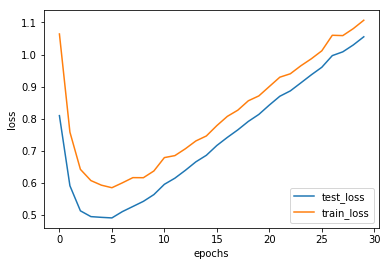

In [7]:
# lossのグラフ化
df_log = pd.DataFrame({"train_loss":train_loss,
             "test_loss":test_loss})
df_log.plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

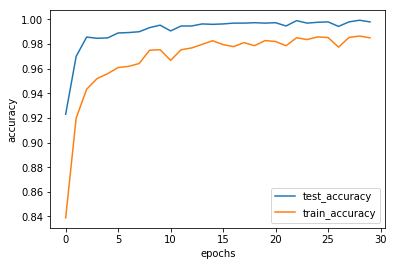

In [8]:
# accuracyのグラフ化
df_log = pd.DataFrame({
             "train_accuracy":train_accuracy,
             "test_accuracy":test_accuracy})
df_log.plot()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.show()

In [9]:
print(train_loss[len(train_loss)-1])
print(test_loss[len(test_loss)-1])

1.1067874646742268
1.055272949063196


In [10]:
print("train_accuracy : ",train_accuracy[len(train_accuracy)-1])
print("test_accuracy  : ",test_accuracy[len(test_accuracy)-1])

train_accuracy :  0.9850625
test_accuracy  :  0.998


In [11]:
tnet.save_params()

W1Start
b1Start
W2Start
b2Start
W3Start
b3Start
